In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file path (Make sure to use raw string format `r""` to avoid issues with backslashes)
file_path = r"D:\PhD\RA\Schafer\IRA\data\transformed\python_plot.dta"

# Load the Stata file
df = pd.read_stata(file_path)
# Apply filtering condition: Drop rows where event_ceiling > (2025 - appyear) for appyear 2016-2023
df = df[~((df["appyear"].between(2016, 2023)) & (df["event_ceiling"] > (2025 - df["appyear"])))]







In [ ]:
df["appyear"] = df["appyear"].astype(int).astype(str)

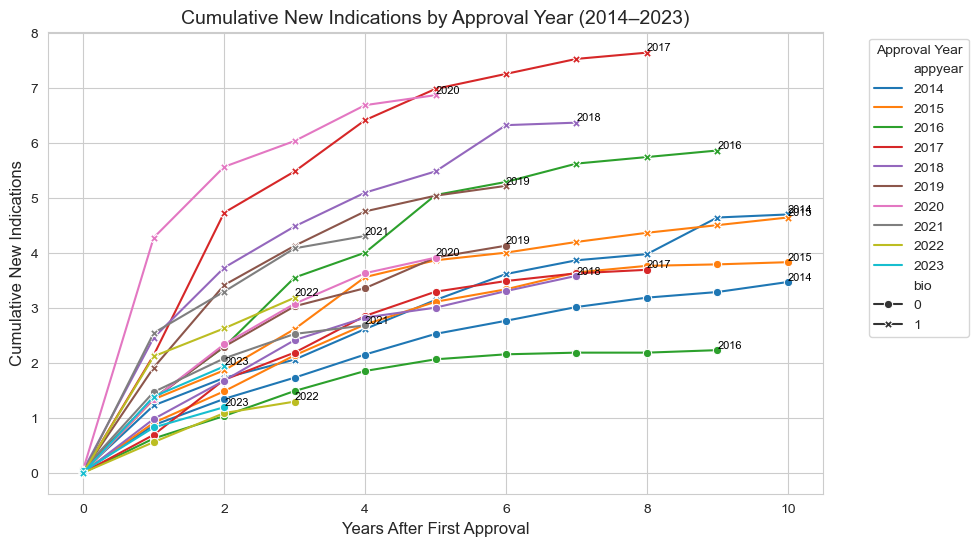

In [19]:
# Set Seaborn style for a cleaner plot
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))

# Plot cumulative new indications across event ceilings, colored by approval year (appyear) and styled by bio
sns.lineplot(
    data=df, x="event_ceiling", y="accunewind",
    hue="appyear", style="bio", markers=True, dashes=False
)

# Add year labels at the end of each line
for year in df["appyear"].unique():
    for bio in df["bio"].unique():
        subset = df[(df["appyear"] == year) & (df["bio"] == bio)]
        if not subset.empty:
            last_point = subset.iloc[-1]  # Get the last row for this appyear & bio
            plt.text(last_point["event_ceiling"], last_point["accunewind"], year,
                     fontsize=8, color="black", verticalalignment="bottom")

# Customize labels and title
plt.xlabel("Years After First Approval", fontsize=12)
plt.ylabel("Cumulative New Indications", fontsize=12)
plt.title("Cumulative New Indications by Approval Year (2014–2023)", fontsize=14)

# Move legend outside the plot for better readability
plt.legend(title="Approval Year", bbox_to_anchor=(1.05, 1), loc="upper left")


# Save the plot as a high-quality PNG file
output_path = r"D:\PhD\RA\Schafer\IRA\graph\cumulative_plot.png"
plt.savefig(output_path, bbox_inches="tight", dpi=300)

# Show the plot
plt.show()

   bio  event_ceiling appyear       ind
0    0            0.0    2014  0.011364
1    0            1.0    2014  0.852273
2    0            2.0    2014  0.477273
3    0            3.0    2014  0.386364
4    0            4.0    2014  0.420455


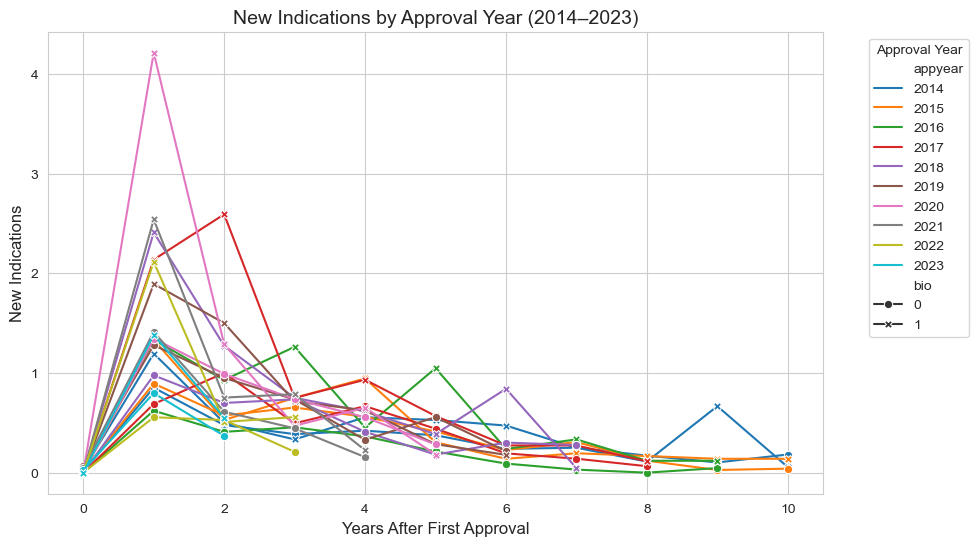

In [23]:
# Define the file path (Make sure to use raw string format `r""` to avoid issues with backslashes)
file_path = r"D:\PhD\RA\Schafer\IRA\data\transformed\python_plot2.dta"

# Load the Stata file
df = pd.read_stata(file_path)
# Apply filtering condition: Drop rows where event_ceiling > (2025 - appyear) for appyear 2016-2023
df = df[~((df["appyear"].between(2016, 2023)) & (df["event_ceiling"] > (2025 - df["appyear"])))]

df["appyear"] = df["appyear"].astype(int).astype(str)

# Check the first few rows to verify data loading
print(df.head())
# Set Seaborn style for a cleaner plot
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))

# Plot cumulative new indications across event ceilings, colored by approval year (appyear) and styled by bio
sns.lineplot(
    data=df, x="event_ceiling", y="ind",
    hue="appyear", style="bio", markers=True, dashes=False
)

# Customize labels and title
plt.xlabel("Years After First Approval", fontsize=12)
plt.ylabel("New Indications", fontsize=12)
plt.title("New Indications by Approval Year (2014–2023)", fontsize=14)

# Move legend outside the plot for better readability
plt.legend(title="Approval Year", bbox_to_anchor=(1.05, 1), loc="upper left")

# Save the plot as a high-quality PNG file
output_path = r"D:\PhD\RA\Schafer\IRA\graph\mean_plot.png"
plt.savefig(output_path, bbox_inches="tight", dpi=300)

# Show the plot
plt.show()